In [29]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
 
def read_data(path):
    image_data = nib.load(path).get_fdata()
    return image_data
                                        
def pad(array, shape):
    """
    Zero-pads an array to a given shape. Returns the padded array and crop slices.
    """
    if array.shape == tuple(shape):
        return array, ...

    padded = np.zeros(shape, dtype=array.dtype)
    offsets = [int((p - v) / 2) for p, v in zip(shape, array.shape)]
    slices = tuple([slice(offset, l + offset) for offset, l in zip(offsets, array.shape)])
    padded[slices] = array

    return padded, slices
    
def preprocess_Normalizition(img,method="min_max"):
    img=img.astype(np.float32)
    if method=="min_max":
        front_img=img[img>0]
        min_value=np.min(front_img)
        max_value=np.max(front_img)
        img=(img-min_value)/(max_value-min_value)
        img[img<0]=0.0
    elif method=="mean":
        front_img=img[img>0]
        mean_value=np.mean(front_img)
        std_value=np.std(front_img)
        img=(img-mean_value)/std_value
    return img 

#求overlay error
def overlay_error(origin,regress):
       return np.mean(np.abs(origin-regress))                                              


In [30]:
origin_img_slice = [] 
regression_img_slice = []  

origin_img_3D = []
regression_img_3D = []

In [31]:
import os

data_root_path="./Mri_data/"
subject_path = "002_S_4654"
seq_length = 9
orig_imgList=[]


for t in os.listdir(os.path.join(data_root_path,subject_path)):
        orig_imgList.append(os.path.join(data_root_path,subject_path,t,"t1.nii.gz"))


0.0
1.0
(144, 176, 144)
0.0
1.0
(144, 176, 144)
0.0
1.0
(144, 176, 144)
0.0
1.0
(144, 176, 144)
0.0
1.0
(144, 176, 144)
0.0
1.0
(144, 176, 144)
0.0
1.0
(144, 176, 144)
0.0
1.0
(144, 176, 144)
0.0
1.0
(144, 176, 144)


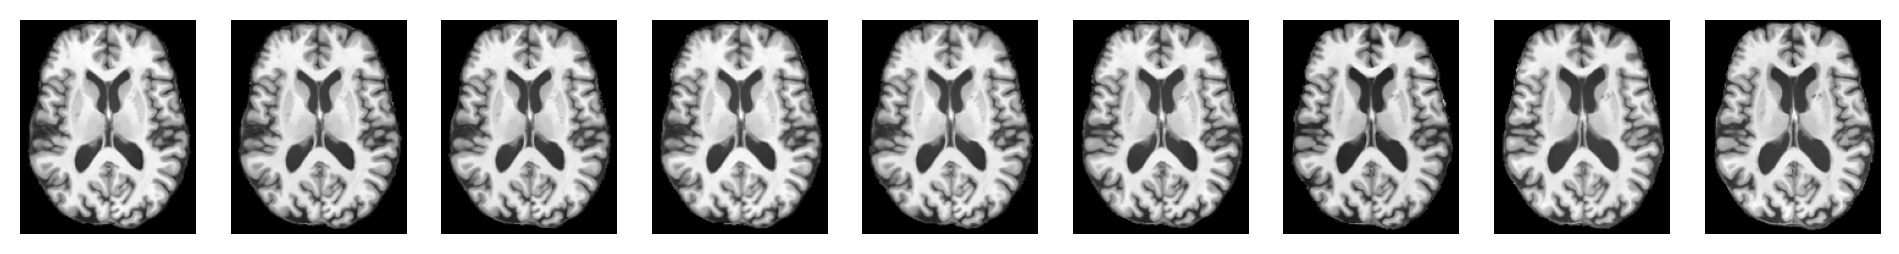

In [32]:
#显示原始图像序列（z=76方向切片）
plt.figure(figsize=(12, 4), dpi=200)
#save png
from PIL import Image

for i in range(seq_length):
   img_path = orig_imgList[i]
   img_data = read_data(img_path)
   img_data,_ = pad(img_data,(144,176,144))
   img_data = preprocess_Normalizition(img_data)
   origin_img_slice.append(img_data[:,:,76])
   origin_img_3D.append(img_data)
   
 

   image = Image.fromarray(np.uint8(img_data[:,:,76].transpose(1,0)*255))
   image.save("./save_slice/sld-"+str(i+1)+".png")

 

   
   
   
   
   
   
   print(np.min(img_data))
   print(np.max(img_data))
   print(img_data.shape)
   plt.subplot(1,  seq_length,  i+1)
   plt.axis('off')
   plt.imshow(img_data[:,:,76].transpose(1,0), cmap = 'gray', origin = 'lower') #channel_last 
plt.show()




0.0
0.9182375073432922
(144, 176, 144)
0.0
0.9160006046295166
(144, 176, 144)
0.0
0.9122360348701477
(144, 176, 144)


0.0
0.8868011236190796
(144, 176, 144)
0.0
0.9182634949684143
(144, 176, 144)
0.0
0.9136651754379272
(144, 176, 144)
0.0
0.8853514194488525
(144, 176, 144)
0.0
0.8789858818054199
(144, 176, 144)


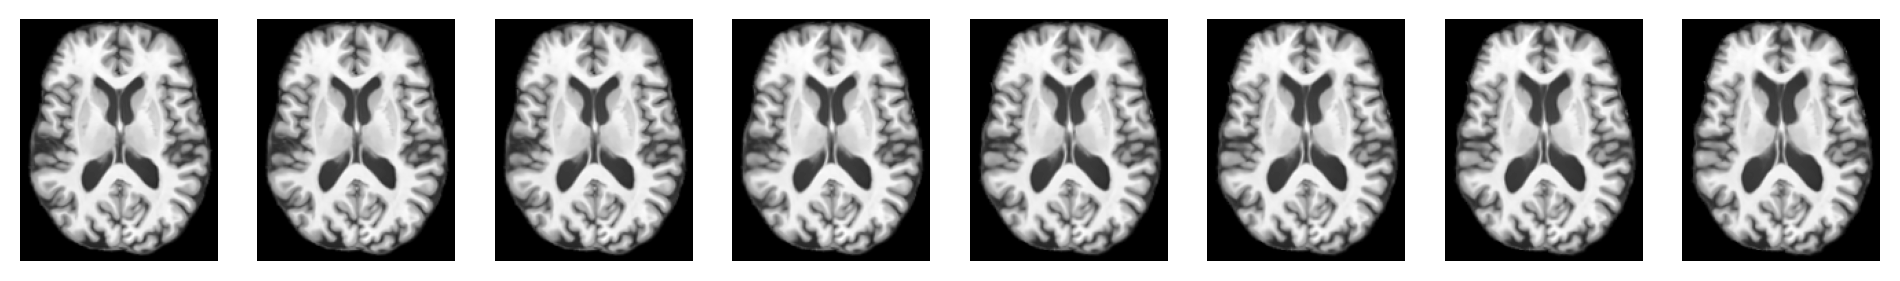

In [33]:
#显示回归生成的序列
gen_root_path="./result-save/"+subject_path+"/warped-t"
plt.figure(figsize=(12, 4), dpi=200)
for i in range(2,seq_length+1):
    gen_path=gen_root_path+str(i-1)+".nii.gz"
    img_data = read_data(gen_path)
    print(np.min(img_data))
    print(np.max(img_data))
    print(img_data.shape)
    regression_img_slice.append(img_data[:,:,76])
    regression_img_3D.append(img_data)
    plt.subplot(1,  seq_length-1,  i-1)
    plt.axis('off')
    plt.imshow(img_data[:,:,76].transpose(1,0), cmap = 'gray', origin = 'lower') #channel_last
plt.show()

-0.23496862
0.32823738
-0.030216902
-0.24717768
0.17289098
-0.04234855
-0.24436611
0.3333039
-0.029118594
-0.34183598
0.18390055
-0.045682527
-0.46793875
0.33991483
-0.019343847
-0.6488059
0.51153255
-0.04165622
-0.5899108
0.32649004
-0.056019373
-0.62440085
0.34912553
-0.05918709


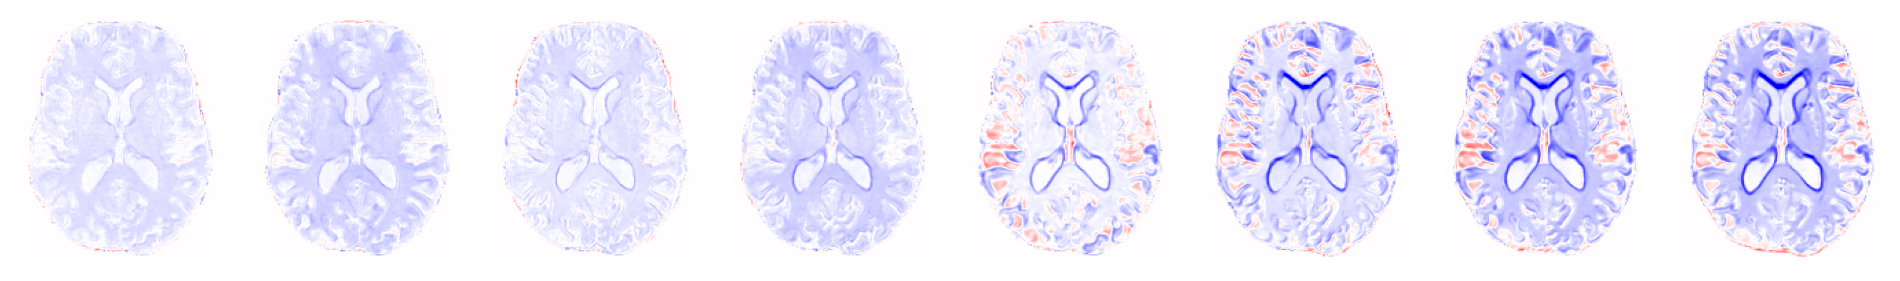

In [34]:
#原始序列内部作差
plt.figure(figsize=(12, 4), dpi=200)
for i in range(1,seq_length):
    diff_img = origin_img_slice[i]-origin_img_slice[0]
    print(np.min(diff_img))
    print(np.max(diff_img))
    print(np.mean(diff_img))
    plt.subplot(1,  seq_length-1,  i)
    plt.axis('off')
    plt.imshow(diff_img.transpose(1,0), cmap = 'seismic', vmin = -1.0, vmax = 1.0, origin = 'lower') #channel_last
    #plt.colorbar()
plt.show()

-0.1946429032832384
0.30787624418735504
-0.030047310938610707
-0.19914381578564644
0.16181796975433826
-0.04185091364792769
-0.17206825874745846
0.25088340044021606
-0.028066059269211453
-0.22596069425344467
0.16755495173856616
-0.04339650669184486
-0.24528772244229913
0.2535765916109085
-0.014552812919904777
-0.2363480031490326
0.37176868319511414
-0.03552914014784655
-0.235020250082016
0.3303565979003906
-0.04846078454333496
-0.31874632835388184
0.2965983599424362
-0.050265140701227146


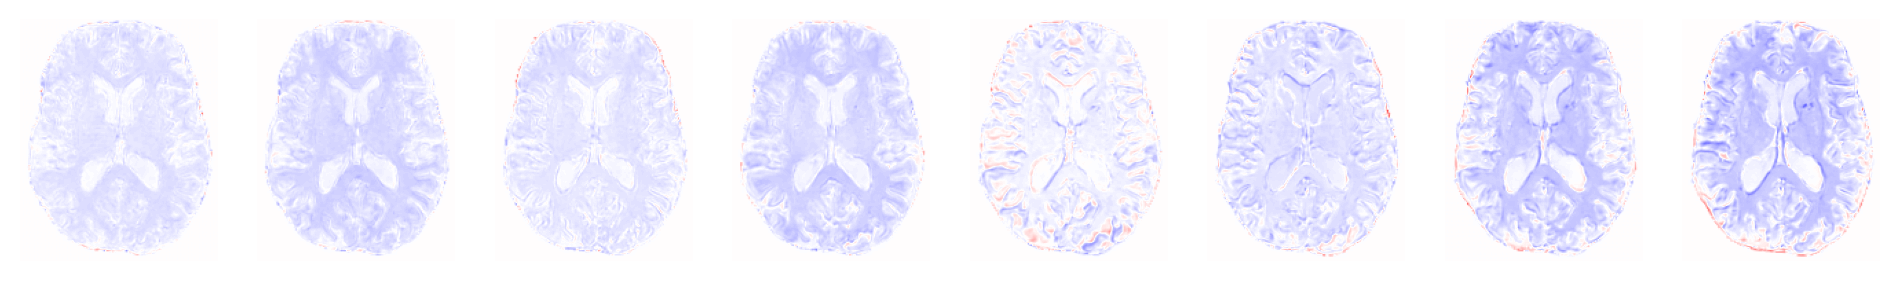

In [35]:
#原始序列和插值序列相同时间作差
plt.figure(figsize=(12, 4), dpi=200)
for i in range(1,seq_length):
    diff_img = origin_img_slice[i]-regression_img_slice[i-1]
    print(np.min(diff_img))
    print(np.max(diff_img))
    print(np.mean(diff_img))
    plt.subplot(1,  seq_length-1,  i)
    plt.axis('off')
    plt.imshow(diff_img.transpose(1,0), cmap = 'seismic', vmin = -1.0, vmax = 1.0, origin = 'lower') #channel_last
    #plt.colorbar()
plt.show()

In [36]:
#显示生成的各个形变场（若有需要，可下载DFviewer进行查看）
